In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [2]:
count = 0
for file in os.listdir("./basketball_reference/game_logs/"):
    if file.endswith("_2017.csv"):
        count += 1
        print count, file

1 Abrines_Alex_2017.csv
2 Acy_Quincy_2017.csv
3 Adams_Steven_2017.csv
4 Afflalo_Arron_2017.csv
5 Ajinca_Alexis_2017.csv
6 Aldrich_Cole_2017.csv
7 Aldridge_LaMarcus_2017.csv
8 Allen_Lavoy_2017.csv
9 Allen_Tony_2017.csv
10 Aminu_Al_Farouq_2017.csv
11 Andersen_Chris_2017.csv
12 Anderson_Alan_2017.csv
13 Anderson_Justin_2017.csv
14 Anderson_Kyle_2017.csv
15 Anderson_Ryan_2017.csv
16 Antetokounmpo_Giannis_2017.csv
17 Anthony_Carmelo_2017.csv
18 Anthony_Joel_2017.csv
19 Ariza_Trevor_2017.csv
20 Arthur_Darrell_2017.csv
21 Asik_Omer_2017.csv
22 Augustin_D.J._2017.csv
23 Babbitt_Luke_2017.csv
24 Baker_Ron_2017.csv
25 Baldwin_Wade_2017.csv
26 Barbosa_Leandro_2017.csv
27 Barea_J.J._2017.csv
28 Barnes_Harrison_2017.csv
29 Barnes_Matt_2017.csv
30 Barton_Will_2017.csv
31 Bass_Brandon_2017.csv
32 Batum_Nicolas_2017.csv
33 Bayless_Jerryd_2017.csv
34 Baynes_Aron_2017.csv
35 Bazemore_Kent_2017.csv
36 Beal_Bradley_2017.csv
37 Beasley_Malik_2017.csv
38 Beasley_Michael_2017.csv
39 Belinelli_Marco_2017.csv


In [3]:
df = pd.DataFrame()
for file in os.listdir("./basketball_reference/game_logs/"):
    if file.endswith("2017.csv"):
        filepath = "./basketball_reference/game_logs/" + file
#         print filepath
        data = pd.read_csv(filepath)
        df = df.append(data)

In [4]:
df.tail()

game        date team  loc  opp   result  gs     mp  fg  fga     ...       \
33    34  2017-03-21  LAL  NaN  LAC  L (-24)   1  35:50   8   14     ...        
34    35  2017-03-24  LAL  NaN  MIN  W (+11)   1  21:18   3    7     ...        
35    36  2017-03-26  LAL  NaN  POR  L (-16)   1  25:57   4    9     ...        
36    37  2017-03-28  LAL  NaN  WAS  L (-11)   1  17:42   3    8     ...        
37    38  2017-03-30  LAL    @  MIN  L (-15)   1   2:14   1    2     ...        

    drb_pct  trb_pct  ast_pct  stl_pct  blk_pct  tov_pct  usg_pct  off_rtg  \
33     20.1     10.5     12.4      1.4      2.6      6.3     19.0    118.0   
34     16.6      9.4     19.4      2.4      0.0     35.0     23.7     75.0   
35     24.4     12.6     14.5      0.0      0.0      9.2     19.8     93.0   
36     18.1     12.9      7.8      5.5      3.8      0.0     24.1    124.0   
37      0.0      0.0      0.0      0.0      0.0      0.0     40.2    105.0   

    def_rtg         Name  
33    134.0  Ivica Zubac  
34    111.0  Ivica Zubac  
35    100.0  Ivica Zubac  
36    108.0  Ivica Zubac  
37    135.0  Ivica Zubac  

[5 rows x 41 columns]

In [5]:
df = df.reset_index()

In [6]:
df

index  game        date team  loc  opp   result  gs     mp  fg  \
0          0     1  2016-10-26  OKC    @  PHI   W (+6)   0  13:24   1   
1          1     2  2016-10-30  OKC  NaN  LAL  W (+17)   0   1:49   1   
2          2     3  2016-11-02  OKC    @  LAC   W (+2)   0   7:54   2   
3          3     4  2016-11-03  OKC    @  GSW  L (-26)   0  19:20   1   
4          4     5  2016-11-05  OKC  NaN  MIN  W (+20)   0  17:16   0   
5          5     6  2016-11-07  OKC  NaN  MIA  W (+12)   0  16:59   2   
6          6     7  2016-11-09  OKC  NaN  TOR  L (-10)   0   4:50   1   
7          7     8  2016-11-11  OKC  NaN  LAC   L (-2)   0  12:56   1   
8          8     9  2016-11-13  OKC  NaN  ORL   L (-2)   0  18:55   3   
9          9    10  2016-11-14  OKC    @  DET  L (-16)   0  17:24   1   
10        10    11  2016-11-16  OKC  NaN  HOU   W (+2)   0  14:30   2   
11        11    12  2016-11-18  OKC  NaN  BRK  W (+19)   0  22:06   4   
12        12    13  2016-11-20  OKC  NaN  IND   L (-4)   0  22:34   4   
13        13    14  2016-11-22  OKC    @  LAL   L (-2)   0   6:49   0   
14        14    15  2016-11-23  OKC    @  SAC  L (-15)   0   3:51   0   
15        15    16  2016-11-26  OKC  NaN  DET  W (+18)   0   0:49   0   
16        16    17  2016-12-11  OKC  NaN  BOS   W (+3)   0   5:12   0   
17        17    18  2016-12-13  OKC    @  POR  L (-19)   0  13:23   2   
18        18    19  2016-12-14  OKC    @  UTA  L (-20)   0   2:49   1   
19        19    20  2016-12-17  OKC  NaN  PHO  W (+13)   0  12:28   0   
20        20    21  2016-12-19  OKC  NaN  ATL   L (-2)   0  17:15   3   
21        21    22  2016-12-21  OKC    @  NOP  W (+11)   0  29:37   6   
22        22    23  2016-12-23  OKC    @  BOS   W (+5)   0   6:10   1   
23        23    24  2016-12-25  OKC  NaN  MIN  W (+12)   0  20:41   3   
24        24    25  2016-12-27  OKC    @  MIA  W (+12)   0  22:26   5   
25        25    26  2016-12-29  OKC    @  MEM  L (-34)   0  26:31   2   
26        26    27  2016-12-31  OKC  NaN  LAC  W (+26)   0  11:46   4   
27        27    28  2017-01-02  OKC    @  MIL   L (-4)   0  13:52   2   
28        28    29  2017-01-04  OKC    @  CHO  L (-11)   0  21:15   2   
29        29    30  2017-01-05  OKC    @  HOU   L (-2)   0  17:06   1   
...      ...   ...         ...  ...  ...  ...      ...  ..    ...  ..   
26109      8     9  2017-01-14  LAL    @  LAC  L (-16)   0   2:32   1   
26110      9    10  2017-01-15  LAL  NaN  DET   L (-5)   0   8:34   2   
26111     10    11  2017-01-17  LAL  NaN  DEN   L (-6)   0  26:01   5   
26112     11    12  2017-01-20  LAL  NaN  IND  W (+13)   0   6:25   2   
26113     12    13  2017-01-22  LAL    @  DAL  L (-49)   0  18:33   1   
26114     13    14  2017-01-25  LAL    @  POR   L (-7)   0  27:40   5   
26115     14    15  2017-01-26  LAL    @  UTA   L (-8)   0  26:19   6   
26116     15    16  2017-01-31  LAL  NaN  DEN   W (+4)   0  21:06   8   
26117     16    17  2017-02-02  LAL    @  WAS   L (-8)   0  11:05   2   
26118     17    18  2017-02-03  LAL    @  BOS   L (-6)   0   4:26   0   
26119     18    19  2017-02-06  LAL    @  NYK  W (+14)   0  17:00   5   
26120     19    20  2017-02-08  LAL    @  DET  L (-19)   0  21:33   2   
26121     20    21  2017-02-10  LAL    @  MIL   W (+8)   0  20:34   7   
26122     21    22  2017-02-14  LAL  NaN  SAC   L (-1)   0  10:11   0   
26123     22    23  2017-02-15  LAL    @  PHO  L (-36)   0  13:49   3   
26124     23    24  2017-02-24  LAL    @  OKC  L (-17)   0  26:49   5   
26125     24    25  2017-02-26  LAL  NaN  SAS  L (-21)   0  18:01   1   
26126     25    26  2017-02-28  LAL  NaN  CHO   L (-5)   0   8:04   2   
26127     26    27  2017-03-03  LAL  NaN  BOS  L (-20)   0  22:31   4   
26128     27    28  2017-03-09  LAL    @  PHO  W (+12)   0  16:58   7   
26129     28    29  2017-03-12  LAL  NaN  PHI   L (-2)   1  18:53   4   
26130     29    30  2017-03-13  LAL    @  DEN  L (-28)   1  30:23  12   
26131     30    31  2017-03-15  LAL    @  HOU  L (-39)   1  10:34

In [7]:
del df['index']

In [8]:
df.columns.values

array(['game', 'date', 'team', 'loc', 'opp', 'result', 'gs', 'mp', 'fg',
       'fga', 'fg_pct', 'fg3', 'fg3a', 'fg3_pct', 'ft', 'fta', 'ft_pct',
       'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts',
       'gmsc', 'plus_minus', 'ts_pct', 'eFG_pct', 'orb_pct', 'drb_pct',
       'trb_pct', 'ast_pct', 'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct',
       'off_rtg', 'def_rtg', 'Name'], dtype=object)

In [9]:
# data cleaning for all game_log files
df['date'] = pd.to_datetime(df['date'])
df.rename(columns={'loc': 'Home_Game'}, inplace=True)
df['Home_Game'] = [0 if item == "@" else 1 for item in df['Home_Game']]
df['result'] = [item[3:].replace(")","") for item in df['result']]
df['result'] = df['result'].astype(float)
df['mp'] = [0 if pd.isnull(item) else round(float(item.split(":")[0]) + float(item.split(":")[1])/60. , 2) for item in df['mp']]

In [10]:
df.mp.max()

60.119999999999997

In [11]:
df[df['mp'] < 1].shape

(206, 41)

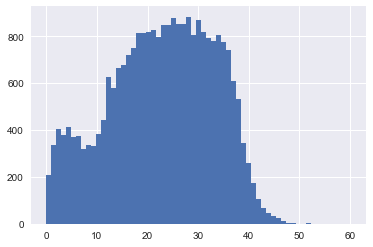

In [12]:
df['mp'].hist(bins = 61)

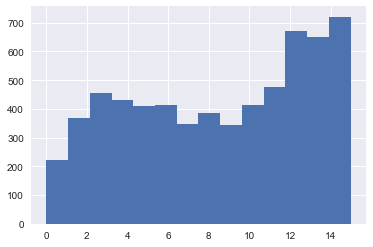

In [13]:
df[df['mp'] < 15]['mp'].hist(bins=14)

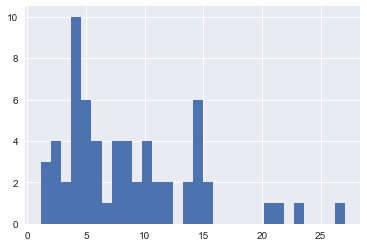

In [14]:
df[df['Name'] == "Cole Aldrich"]['mp'].hist(bins=30)

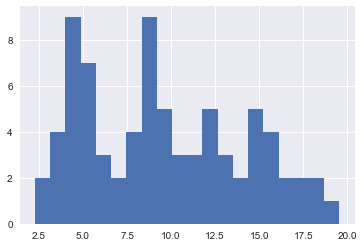

In [15]:
df[df['Name'] == "JaVale McGee"]['mp'].hist(bins=20)

In [16]:
df = df[df['mp'] > 2]

In [17]:
df.shape

(25581, 41)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25581 entries, 0 to 26138
Data columns (total 41 columns):
game          25581 non-null int64
date          25581 non-null datetime64[ns]
team          25581 non-null object
Home_Game     25581 non-null int64
opp           25581 non-null object
result        25581 non-null float64
gs            25581 non-null int64
mp            25581 non-null float64
fg            25581 non-null int64
fga           25581 non-null int64
fg_pct        24866 non-null float64
fg3           25581 non-null int64
fg3a          25581 non-null int64
fg3_pct       18383 non-null float64
ft            25581 non-null int64
fta           25581 non-null int64
ft_pct        14805 non-null float64
orb           25581 non-null int64
drb           25581 non-null int64
trb           25581 non-null int64
ast           25581 non-null int64
stl           25581 non-null int64
blk           25581 non-null int64
tov           25581 non-null int64
pf            25581 non-null i

In [19]:
# del df['fg_pct']
# del df['fg3_pct']
# del df['ft_pct']

In [20]:
df = df.dropna(axis=0, how='any')

In [21]:
cols = list(df.columns.values[5:-1])

In [22]:
cols = [col for col in cols if col not in ['fg_pct','fg3_pct','ft_pct']] + ['Home_Game']

In [23]:
cols

['result',
 'gs',
 'mp',
 'fg',
 'fga',
 'fg3',
 'fg3a',
 'ft',
 'fta',
 'orb',
 'drb',
 'trb',
 'ast',
 'stl',
 'blk',
 'tov',
 'pf',
 'pts',
 'gmsc',
 'plus_minus',
 'ts_pct',
 'eFG_pct',
 'orb_pct',
 'drb_pct',
 'trb_pct',
 'ast_pct',
 'stl_pct',
 'blk_pct',
 'tov_pct',
 'usg_pct',
 'off_rtg',
 'def_rtg',
 'Home_Game']

In [24]:
df

game       date team  Home_Game  opp  result  gs     mp  fg  fga  \
3         4 2016-11-03  OKC          0  GSW   -26.0   0  19.33   1    6   
7         8 2016-11-11  OKC          1  LAC    -2.0   0  12.93   1    2   
9        10 2016-11-14  OKC          0  DET   -16.0   0  17.40   1    7   
10       11 2016-11-16  OKC          1  HOU     2.0   0  14.50   2    4   
20       21 2016-12-19  OKC          1  ATL    -2.0   0  17.25   3    8   
21       22 2016-12-21  OKC          0  NOP    11.0   0  29.62   6   12   
23       24 2016-12-25  OKC          1  MIN    12.0   0  20.68   3    9   
25       26 2016-12-29  OKC          0  MEM   -34.0   0  26.52   2   11   
29       30 2017-01-05  OKC          0  HOU    -2.0   0  17.10   1    2   
30       31 2017-01-07  OKC          1  DEN    15.0   0  19.52   1    4   
34       35 2017-01-15  OKC          0  SAC     4.0   0  17.13   3    5   
35       36 2017-01-16  OKC          0  LAC   -22.0   0  13.53   1    4   
38       39 2017-01-25  OKC          0  NOP     9.0   0  18.48   4    5   
39       40 2017-01-26  OKC          1  DAL    11.0   0  16.38   1    3   
44       45 2017-02-13  OKC          0  WAS   -22.0   0  20.23   2    7   
47       48 2017-02-26  OKC          1  NOP     8.0   1  34.98   4   12   
56       57 2017-03-16  OKC          0  TOR    21.0   0  20.20   3    7   
58       59 2017-03-20  OKC          1  GSW   -16.0   0  19.55   0    8   
59       60 2017-03-22  OKC          1  PHI    25.0   0  24.17   1    6   
72        5 2016-11-09  DAL          0  GSW   -21.0   0  24.37   2    6   
75        8 2017-01-13  BRK          0  TOR   -19.0   0   5.18   3    3   
76        9 2017-01-15  BRK          1  HOU   -25.0   0  20.43   2    6   
78       11 2017-01-20  BRK          0  NOP    29.0   0  21.62   3    5   
79       12 2017-01-21  BRK          0  CHO    -7.0   0  17.07   5    7   
81       14 2017-01-25  BRK          1  MIA    -3.0   0   5.87   2    3   
84       17 2017-02-03  BRK          1  IND    -9.0   0  12.55   2    7   
86       19 2017-03-01  BRK          0  SAC     9.0   0  11.05   1    2   
87       20 2017-03-03  BRK          0  UTA   -15.0   0  18.28   5    7   
88       21 2017-03-04  BRK          0  POR   -14.0   0  17.10   2    4   
90       23 2017-03-08  BRK          0  ATL    -5.0   0  22.12   2    6   
...     ...        ...  ...        ...  ...     ...  ..    ...  ..  ...   
25880    30 2016-12-20  IND          0  NYK    -7.0   1  36.65   9   17   
25881    31 2016-12-22  IND          1  BOS    -7.0   1  37.47   6   11   
25883    33 2016-12-28  IND          0  WAS    -6.0   1  35.17   5   10   
25887    37 2017-01-05  IND          1  BRK    12.0   1  32.45   3   10   
25888    38 2017-01-07  IND          1  NYK    14.0   1  28.52   6    8   
25892    42 2017-01-20  IND          0  LAL   -13.0   1  32.63   3    9   
25893    43 2017-01-21  IND          0  UTA    -9.0   1  38.35   8   11   
25895    45 2017-01-26  IND          0  MIN     6.0   1  31.17   4   10   
25896    46 2017-01-27  IND          1  SAC     4.0   1  28.65   3    9   
25897    47 2017-01-29  IND          1  HOU    19.0   1  30.40   5    9   
25911    61 2017-03-19  IND          0  TOR   -25.0   1  26.13   7    9   
25919    69 2017-04-02  IND          0  CLE    -5.0   1  28.52   9   12   
25967    43 2017-03-06  CHO          1  IND    12.0   1  34.40   5   10   
26063     7 2016-12-16  CHI          1  MIL   -26.0   0   8.73   1    4   
26067    11 2017-01-12  CHI          0  NYK   -15.0   1  34.18   2    6   
26068    12 2017-01-15  CHI          0  MEM     4.0   1  15.07   2    3   
26070    14 2017-01-20  CHI          0  ATL    -9.0   0  15.45   3    7   
26071    15 2017-01-21  CHI          1  SAC     3.0   0  23.10   4    8   
26072    16 2017-01-24  CHI          0  ORL     8.0   0  19.78   1    4   
26073    17 2017-01-25  CHI          1  ATL    -5.0   0  22.70   0    4   
26074    18 2017-01-27  CHI          1  MIA   -12.0   1  27.43   5   11   
26076    20 2017-02-01  CHI     

In [25]:
X = df[cols]

In [26]:
# setting y as win/loss
y = [1 if result > 0 else 0 for result in X['result']]
y = pd.DataFrame(y,columns=["result"])

In [27]:
# interaction terms
import patsy
from sklearn.preprocessing import PolynomialFeatures

formula = "%s ~ (%s)**2" % ("result", " + ".join([col for col in cols[:5] if col not in ["result"]]))
yp, Xp = patsy.dmatrices(formula, data=df, return_type="dataframe")

Xp.head(1).values

array([[   1.  ,    0.  ,   19.33,    1.  ,    6.  ,    0.  ,    0.  ,
           0.  ,   19.33,  115.98,    6.  ]])

In [28]:
pf = PolynomialFeatures(degree=2)
pf.fit_transform(Xp[Xp.columns[:5]].values)[0]

array([   1.    ,    1.    ,    0.    ,   19.33  ,    1.    ,    6.    ,
          1.    ,    0.    ,   19.33  ,    1.    ,    6.    ,    0.    ,
          0.    ,    0.    ,    0.    ,  373.6489,   19.33  ,  115.98  ,
          1.    ,    6.    ,   36.    ])

In [29]:
X.head(1).values

array([[ -26.   ,    0.   ,   19.33 ,    1.   ,    6.   ,    1.   ,
           6.   ,    2.   ,    2.   ,    1.   ,    2.   ,    3.   ,
           1.   ,    0.   ,    0.   ,    0.   ,    0.   ,    5.   ,
           3.2  ,  -13.   ,    0.363,    0.25 ,    5.6  ,   11.5  ,
           8.6  ,    7.6  ,    0.   ,    0.   ,    0.   ,   14.8  ,
         100.   ,  132.   ,    0.   ]])

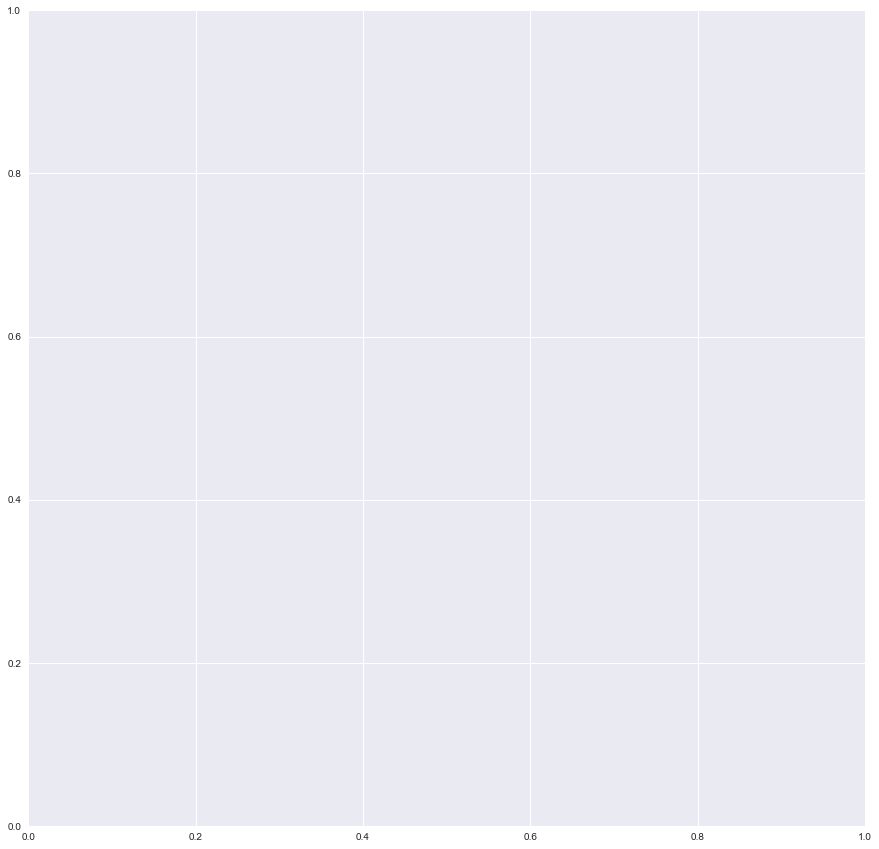

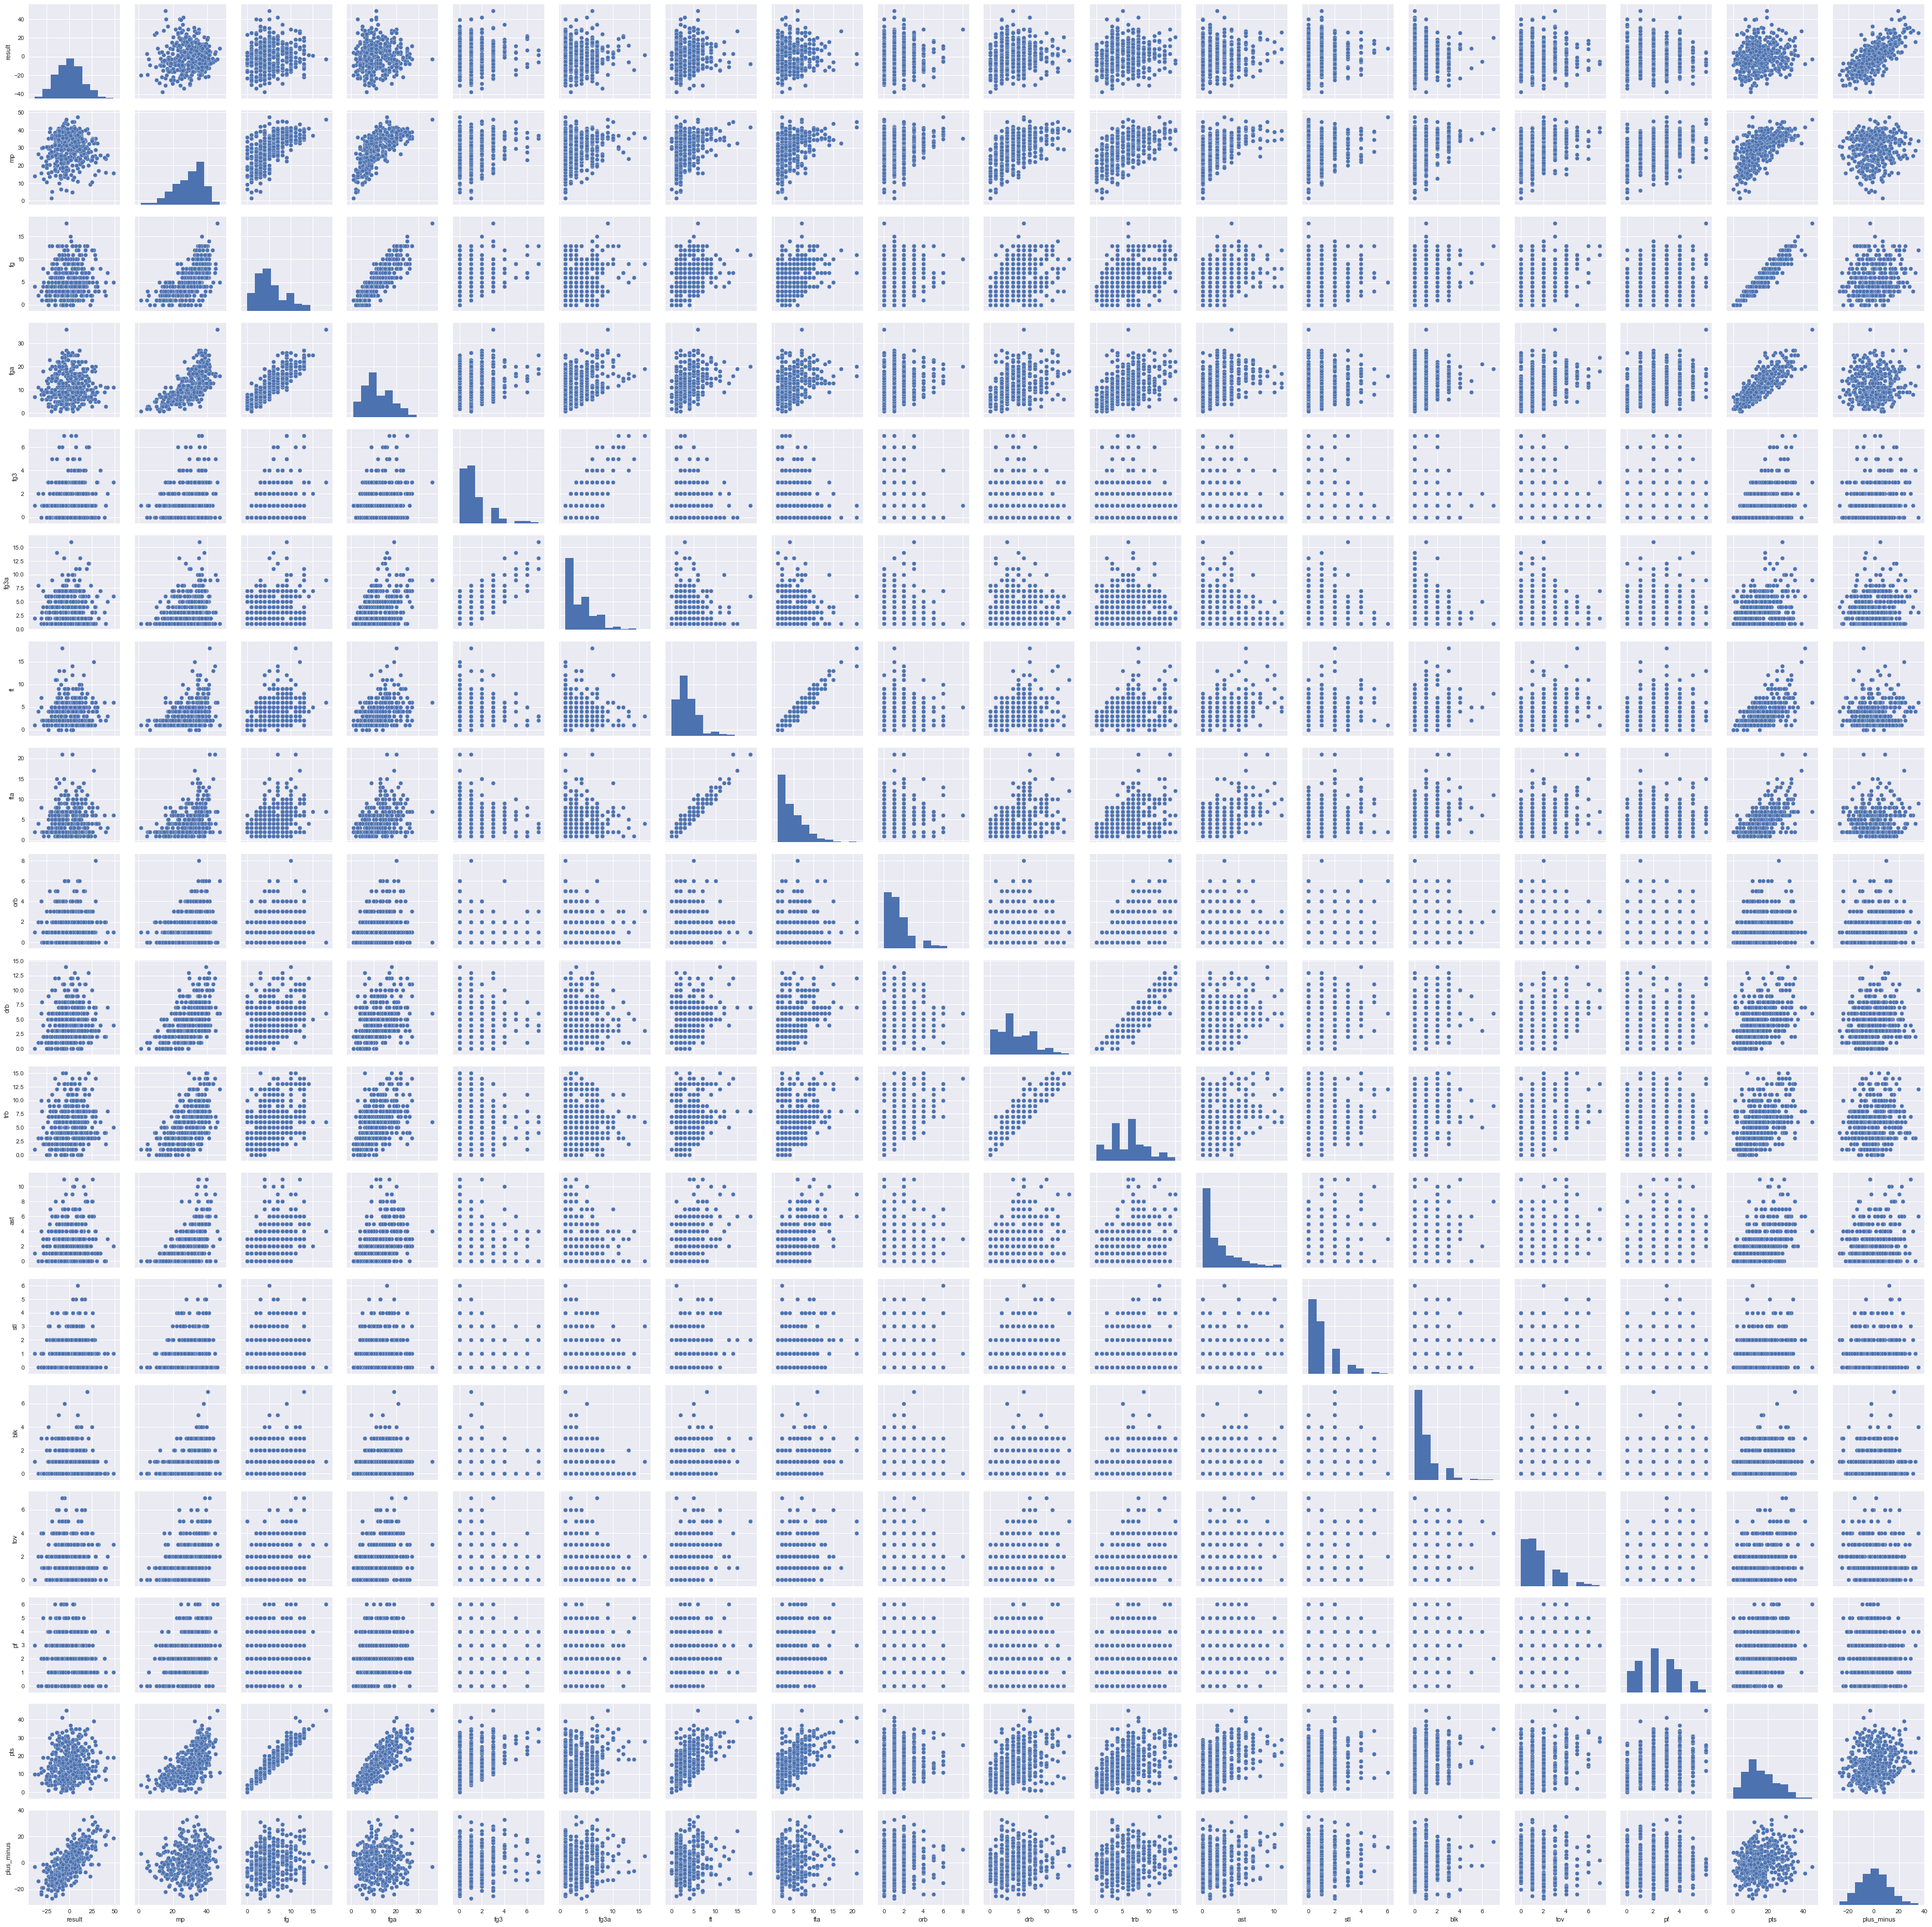

In [27]:
fig, ax = plt.subplots(figsize=(15,15))
sns.pairplot(X[['result', 'mp', 'fg', 'fga', 'fg3', 'fg3a', 'ft', 'fta', 'orb', 'drb',\
                'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'plus_minus']])
plt.show()

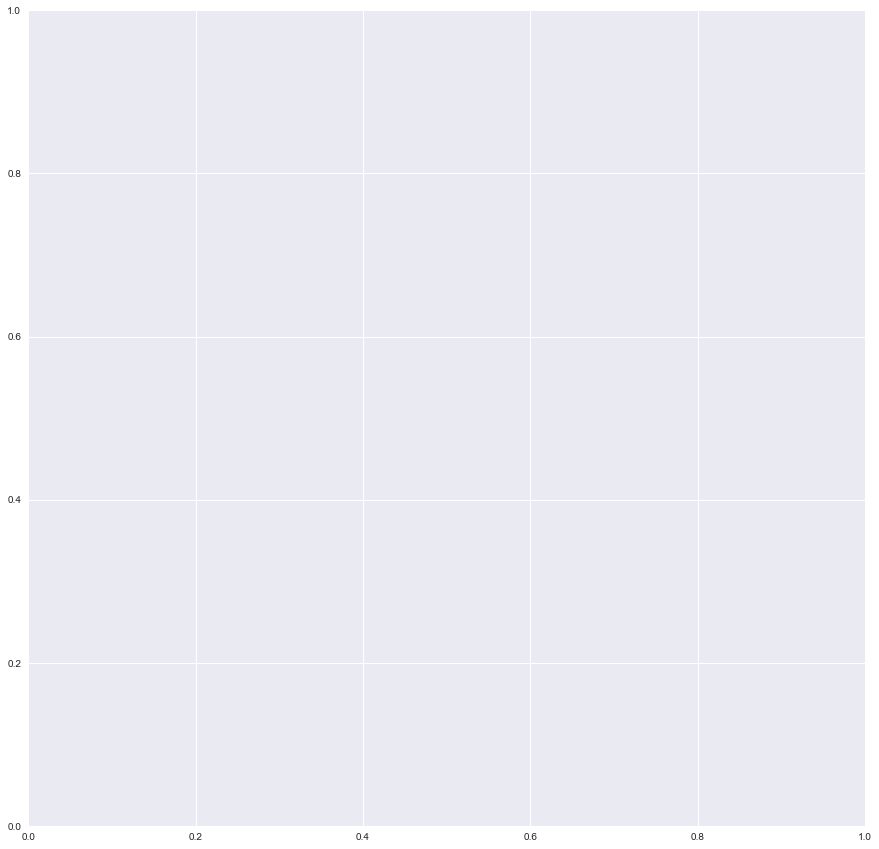

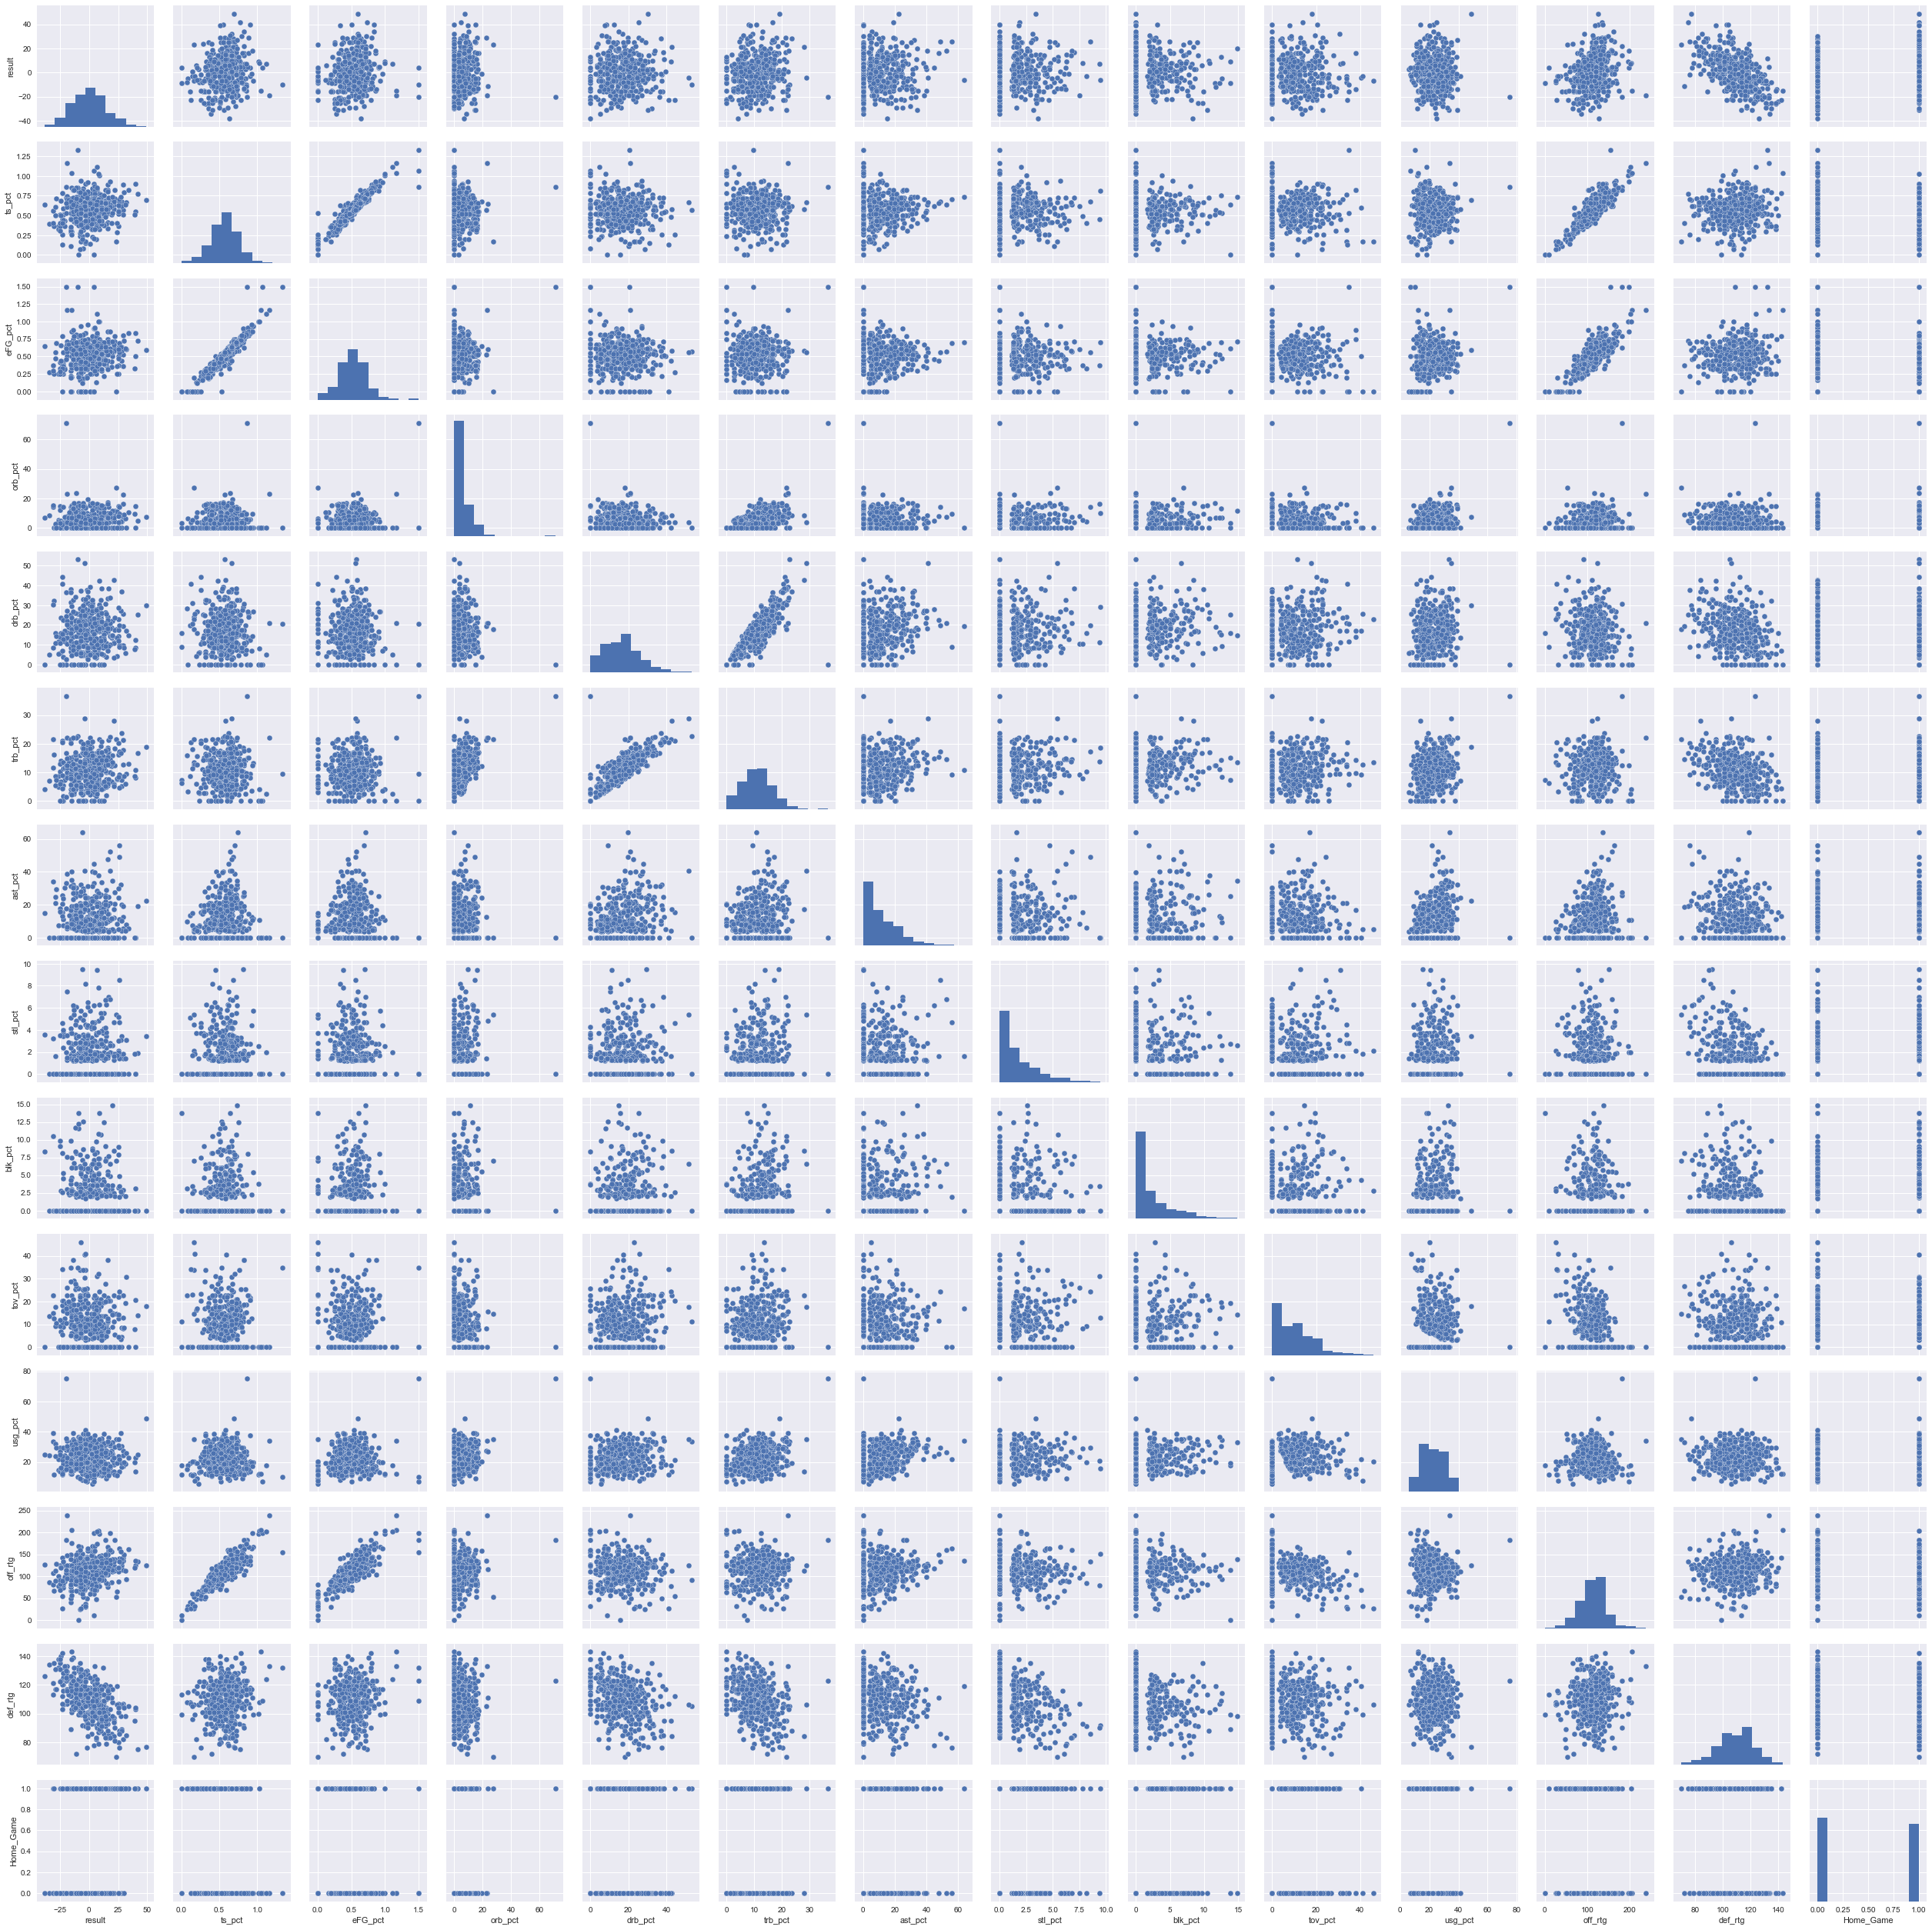

In [28]:
fig, ax = plt.subplots(figsize=(15,15))
sns.pairplot(X[['result', 'ts_pct', 'eFG_pct', 'orb_pct', 'drb_pct', 'trb_pct', 'ast_pct',\
                'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct', 'off_rtg', 'def_rtg', 'Home_Game']])
plt.show()

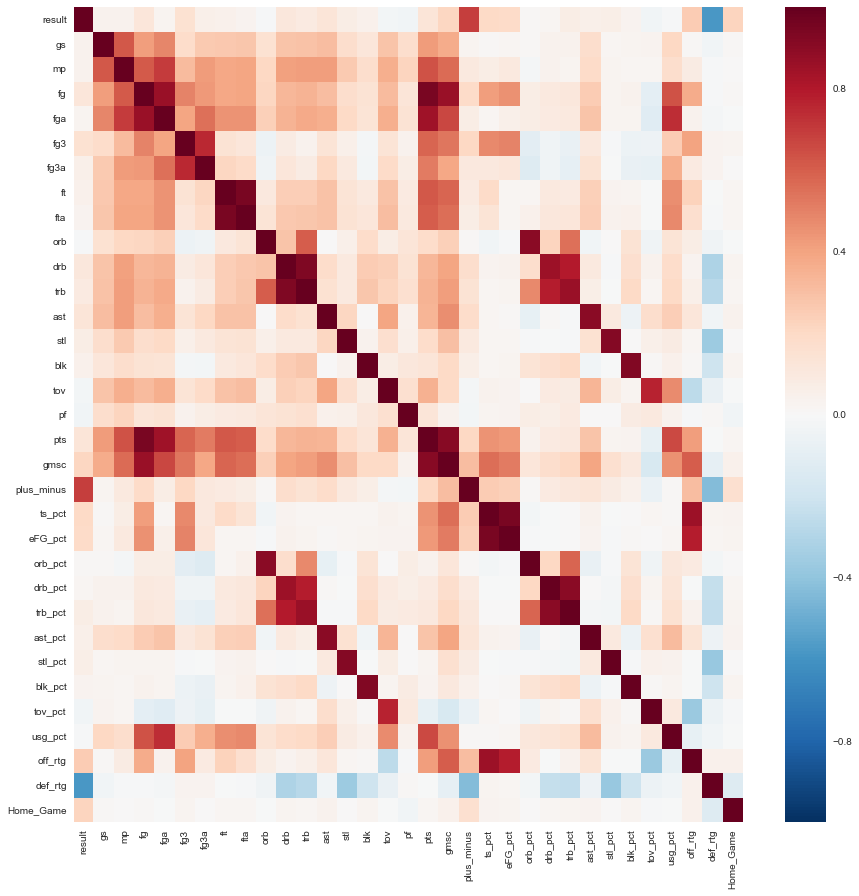

In [59]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(X.corr(), ax=ax)

In [29]:
# all players
# result        1.000000
# plus_minus    0.723178
# off_rtg       0.229745
# gmsc          0.205061
# Home_Game     0.174465
# ts_pct        0.166938
# eFG_pct       0.141529
# trb           0.139657
# drb           0.124308
# trb_pct       0.123673
# fg3           0.120608
# pts           0.118053
# stl           0.098659
# ast           0.094537
# fg            0.092688
# fta           0.087191
# mp            0.086191
# ft            0.085744
# stl_pct       0.084657
# orb           0.079001
# blk           0.061227
# gs            0.059921
# drb_pct       0.055574
# orb_pct       0.049193
# fga           0.025967
# blk_pct       0.024232
# ast_pct       0.023762
# fg3a          0.019927
# usg_pct      -0.050956
# tov          -0.053110
# pf           -0.079974
# tov_pct      -0.080757
# def_rtg      -0.587640
X.corr()['result'].sort_values(ascending=False)

result        1.000000
plus_minus    0.691710
off_rtg       0.256791
Home_Game     0.224521
gmsc          0.218293
ts_pct        0.203056
eFG_pct       0.190220
fg3           0.150127
ast           0.132464
pts           0.129563
fg            0.119042
drb           0.113678
trb           0.089115
trb_pct       0.076411
stl           0.074715
stl_pct       0.066798
fg3a          0.059840
ast_pct       0.057251
ft            0.048970
blk           0.047042
mp            0.046574
gs            0.042707
blk_pct       0.038167
fta           0.033853
fga           0.024229
drb_pct       0.023375
orb_pct       0.012008
usg_pct      -0.010971
orb          -0.013939
tov          -0.024042
pf           -0.033095
tov_pct      -0.033719
def_rtg      -0.583623
Name: result, dtype: float64

In [30]:
del X['result']
del X['gs']

In [31]:
X.shape

(11101, 31)

In [32]:
y.shape

(11101, 1)

In [33]:
# checking for nan's
count = 0
for col in X.columns:
    for i, row in enumerate(X[col]):
        if np.isnan(row):
            count += 1
            print i, col, row
print count

0


In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
Xs = StandardScaler().fit_transform(X)

In [36]:
pd.DataFrame(Xs, columns=X.columns).head()

mp        fg       fga       fg3      fg3a        ft       fta  \
0 -1.116349 -1.292306 -0.928332 -0.301317  0.800344 -0.460671 -0.681094   
1 -1.907323 -1.292306 -1.634195 -1.002851 -1.160075 -0.846976 -0.681094   
2 -1.354877 -1.292306 -0.751867 -0.301317  0.408260 -0.460671 -0.681094   
3 -1.713287 -0.977676 -1.281263  0.400218 -0.375908 -0.846976 -1.025237   
4 -1.373415 -0.663045 -0.575401 -0.301317  0.408260 -0.460671 -0.681094   

        orb       drb       trb    ...       drb_pct   trb_pct   ast_pct  \
0  0.058022 -0.623463 -0.495489    ...     -0.298710 -0.067353 -0.638517   
1 -0.770937 -0.993021 -1.108316    ...     -0.674224 -0.844659 -1.163069   
2 -0.770937 -0.993021 -1.108316    ...     -0.809826 -1.069215 -0.534987   
3 -0.770937 -1.362578 -1.414730    ...     -1.498268 -1.552872 -0.479771   
4 -0.770937 -0.993021 -1.108316    ...     -0.642931 -0.948300 -1.163069   

    stl_pct   blk_pct   tov_pct   usg_pct   off_rtg   def_rtg  Home_Game  
0 -0.866805 -0.538641 -1.181036 -1.054467 -0.406880  1.724493   -0.99973  
1 -0.866805 -0.538641  1.545923 -1.323846 -1.201855  0.293862    1.00027  
2 -0.866805 -0.538641  0.013330 -0.125110 -1.499970 -0.183016   -0.99973  
3  0.866573 -0.538641 -1.181036 -1.189156  1.381812 -0.341975    1.00027  
4  0.708993 -0.538641 -1.181036 -0.030828  0.222474  0.532300    1.00027  

[5 rows x 31 columns]

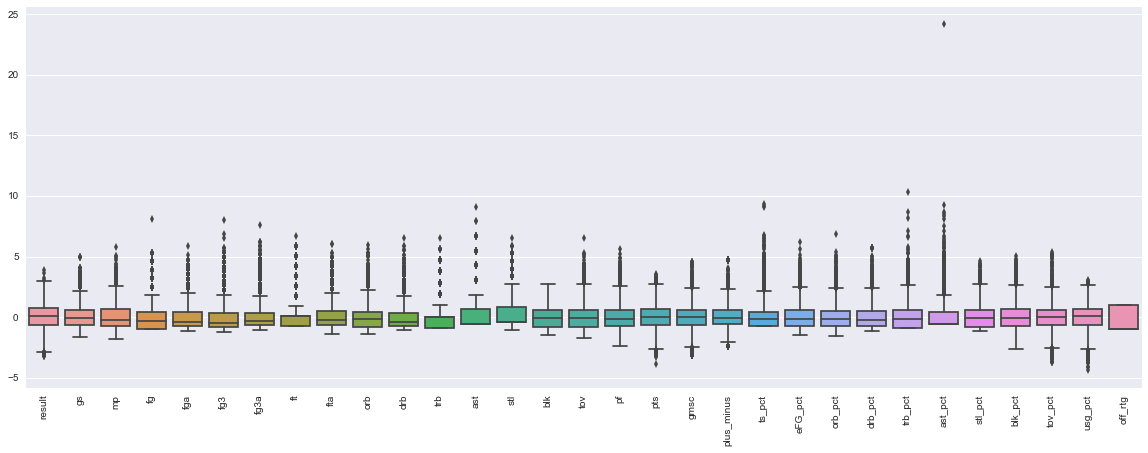

In [37]:
fig = plt.figure(figsize=(20,7))
ax = fig.gca()
ax = sns.boxplot(data=Xs, ax=ax)#, notch=True)
ax.set_xticklabels(cols, rotation=90)
plt.show()

In [38]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=8)

/Users/anthony-mba/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [39]:
print X_train.shape, y_train.shape, X_test.shape, y_test.shape

(7770, 31) (7770, 1) (3331, 31) (3331, 1)


In [40]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV

In [41]:
np.logspace(0,1,100)

array([  1.        ,   1.02353102,   1.04761575,   1.07226722,
         1.09749877,   1.12332403,   1.149757  ,   1.17681195,
         1.20450354,   1.23284674,   1.26185688,   1.29154967,
         1.32194115,   1.35304777,   1.38488637,   1.41747416,
         1.45082878,   1.48496826,   1.51991108,   1.55567614,
         1.59228279,   1.62975083,   1.66810054,   1.70735265,
         1.7475284 ,   1.78864953,   1.83073828,   1.87381742,
         1.91791026,   1.96304065,   2.009233  ,   2.05651231,
         2.10490414,   2.15443469,   2.20513074,   2.25701972,
         2.3101297 ,   2.36448941,   2.42012826,   2.47707636,
         2.53536449,   2.59502421,   2.65608778,   2.71858824,
         2.7825594 ,   2.84803587,   2.91505306,   2.98364724,
         3.05385551,   3.12571585,   3.19926714,   3.27454916,
         3.35160265,   3.43046929,   3.51119173,   3.59381366,
         3.67837977,   3.76493581,   3.85352859,   3.94420606,
         4.03701726,   4.1320124 ,   4.22924287,   4.32

In [42]:
# Set up the parameters. Looking at C regularization strengths on a log scale.
# This takes awhile...
gs_params = {
    'penalty':['l2'],#['l1','l2'],
    'solver':['liblinear'],
    'C': [7.9248289835391752] #np.logspace(0,1,100)
}

lr_gridsearch = GridSearchCV(LogisticRegression(), gs_params, cv=3, verbose=1, n_jobs=4)

In [120]:
lr_gridsearch.fit(X_train, np.ravel(y_train))

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   23.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  5.1min
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:  7.1min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'penalty': ['l2'], 'C': [1.0, 1.0235310218990261, 1.0476157527896648, 1.0722672220103233, 1.0974987654930561, 1.1233240329780274, 1.1497569953977358, 1.1768119524349985, 1.2045035402587823, 1.2328467394420661, 1.2618568830660204, 1.2915496650148839, 1.3219411484660291, 1.3530477745798071...93145, 993.04675586239534, 995.35911528349027, 997.67685915004029, 1000.0], 'solver': ['liblinear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [126]:
lr_gridsearch.best_score_

0.8287706611570248

In [127]:
# {'C': 954.5484566618328, 'penalty': 'l2', 'solver': 'liblinear'}  = 0.829
# {'C': 10.0, 'penalty': 'l2', 'solver': 'liblinear'}               = 0.829
# {'C': 6.1359072734131725, 'penalty': 'l2', 'solver': 'liblinear'} = 0.830
# {'C': 7.9248289835391752, 'penalty': 'l2', 'solver': 'liblinear'} = 0.829
lr_gridsearch.best_params_

{'C': 7.9248289835391752, 'penalty': 'l2', 'solver': 'liblinear'}

In [128]:
best_lr = lr_gridsearch.best_estimator_
best_lr.score(X_test, y_test)

0.836697800542332

In [129]:
coef_df = pd.DataFrame({
        'coef':best_lr.coef_[0],
        'feature':X.columns
    })
coef_df['abs_coef'] = np.abs(coef_df.coef)
coef_df.sort_values('abs_coef', ascending=False, inplace=True)

In [130]:
coef_df

coef     feature  abs_coef
18 -9.527166      ts_pct  9.527166
19  0.994359     eFG_pct  0.994359
22  0.808019     trb_pct  0.808019
10  0.428770         ast  0.428770
21 -0.411778     drb_pct  0.411778
20 -0.404857     orb_pct  0.404857
30  0.360762   Home_Game  0.360762
24 -0.256959     stl_pct  0.256959
9  -0.136497         trb  0.136497
13 -0.129519         tov  0.129519
29 -0.127992     def_rtg  0.127992
7  -0.118693         orb  0.118693
17  0.117016  plus_minus  0.117016
23 -0.115514     ast_pct  0.115514
25 -0.099328     blk_pct  0.099328
26  0.097436     tov_pct  0.097436
11 -0.095081         stl  0.095081
16  0.093609        gmsc  0.093609
5  -0.092818          ft  0.092818
3   0.089880         fg3  0.089880
6   0.072784         fta  0.072784
28  0.063800     off_rtg  0.063800
2   0.059111         fga  0.059111
14 -0.049683          pf  0.049683
0  -0.043972          mp  0.043972
4  -0.040673        fg3a  0.040673
15 -0.039465         pts  0.039465
12 -0.025751         blk  0.025751
27  0.023880     usg_pct  0.023880
1  -0.018264          fg  0.018264
8  -0.017804         drb  0.017804

In [43]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [44]:
dtc = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)

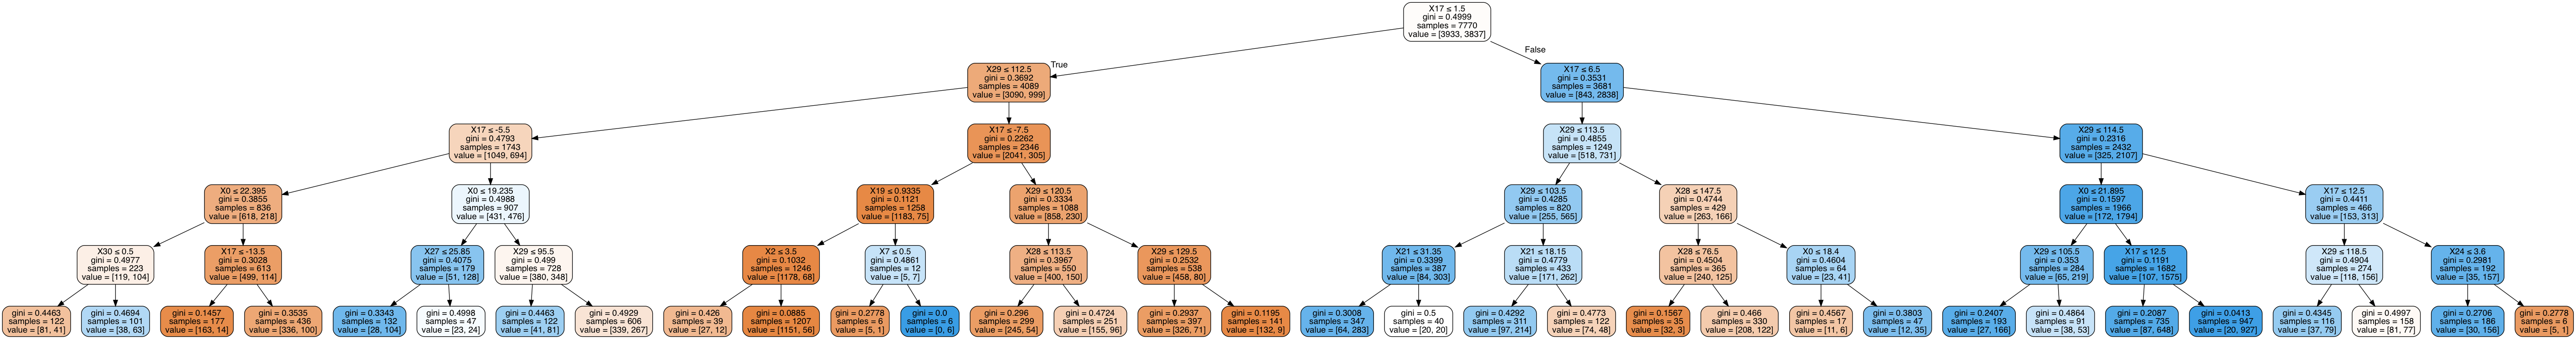

In [45]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()  

export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [46]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

/Users/anthony-mba/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [47]:
print rfc.score(X_train, y_train)
print rfc.score(X_test, y_test)

0.99111969112
0.771239867908


In [136]:
pd.DataFrame(rfc.feature_importances_, index=X_train.columns.values, columns=['feature_importances']).sort_values('feature_importances', ascending=False)

feature_importances
plus_minus             0.232826
def_rtg                0.160771
off_rtg                0.045099
mp                     0.039594
ts_pct                 0.038896
gmsc                   0.033913
usg_pct                0.031377
drb_pct                0.030022
eFG_pct                0.028708
ast_pct                0.028593
trb_pct                0.028335
tov_pct                0.022867
stl_pct                0.019770
pts                    0.019714
fga                    0.019190
pf                     0.018325
drb                    0.017173
orb_pct                0.017036
ft                     0.016317
ast                    0.015857
blk_pct                0.015462
trb                    0.015413
fg                     0.014325
fg3a                   0.014003
Home_Game              0.013430
fta                    0.013297
tov                    0.012172
fg3                    0.011658
stl                    0.009629
orb                    0.009317
blk                    0.006910

In [137]:
probabilities = y_test

In [138]:
probabilities = pd.concat([probabilities, pd.DataFrame(rfc.predict(X_test), columns=['predicted'], index=y_test.index), pd.DataFrame(rfc.predict_proba(X_test), index=y_test.index)], axis=1)

In [139]:
probabilities.head()

result  predicted    0    1
1169        0          0  0.7  0.3
10133       0          0  0.7  0.3
8656        1          1  0.2  0.8
5378        1          1  0.1  0.9
3952        0          0  0.8  0.2

In [140]:
from sklearn.metrics import confusion_matrix

In [141]:
confusion_matrix(probabilities['result'], probabilities['predicted'])

array([[1399,  251],
       [ 454, 1215]])

In [142]:
from sklearn.metrics import classification_report

In [143]:
print classification_report(probabilities['result'], probabilities['predicted'])

             precision    recall  f1-score   support

          0       0.75      0.85      0.80      1650
          1       0.83      0.73      0.78      1669

avg / total       0.79      0.79      0.79      3319



In [208]:
# baseline: this is why you need spread and score
y.mean()

result    0.495164
dtype: float64

In [144]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV